[Read more about LRs by clicking here.](https://scikit-learn.org/stable/modules/linear_model.html)

Import locally required modules.

In [1]:
# Add local modules' path
# Restart notebook if you modify these imports' files
import os
import sys

module_path = os.path.abspath(os.path.join("..", "common"))

if module_path not in sys.path:
    sys.path.append(module_path)

# Actual imports
from common import kUtils

Get the split data.

In [2]:
import numpy as np # Used here only for the data type but extensively used later

X_train: np.ndarray; X_test: np.ndarray; X_val: np.ndarray; y_train: np.ndarray; y_test: np.ndarray; y_val: np.ndarray;

X_train, X_test, X_val, y_train, y_test, y_val = kUtils.get_split_data()

Let's normalize our age column.

In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

kUtils.get_loaded_data()

kUtils._loaded_data["Age"] = MinMaxScaler().fit_transform(kUtils._loaded_data[['Age']])

Set up the model and train it.

In [4]:

from sklearn.linear_model import LinearRegression

lr_model: LinearRegression = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

### Metrics

In [5]:
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report, roc_curve, auc

y_pred_continuous: np.ndarray = lr_model.predict(X_test)

y_pred_binary: np.ndarray = (y_pred_continuous >= 0.5).astype(int)

mse: float | np.ndarray = mean_squared_error(y_test, y_pred_continuous)
accuracy: float = accuracy_score(y_test, y_pred_binary)
conf_matrix: np.ndarray = confusion_matrix(y_test, y_pred_binary)
report: str | dict = classification_report(y_test, y_pred_binary)

print("Mean Squared Error (MSE):", mse)
print("Accuracy (threshold = 0.5):", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

fpr: np.ndarray; tpr: np.ndarray; thresholds: np.ndarray;

fpr, tpr, thresholds = roc_curve(y_test, y_pred_continuous)
roc_auc: float = auc(fpr, tpr)

Mean Squared Error (MSE): 0.03229428042713947
Accuracy (threshold = 0.5): 0.9911428571428571
Confusion Matrix:
 [[6919   62]
 [  62 6957]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      6981
         1.0       0.99      0.99      0.99      7019

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



### Plotting the model

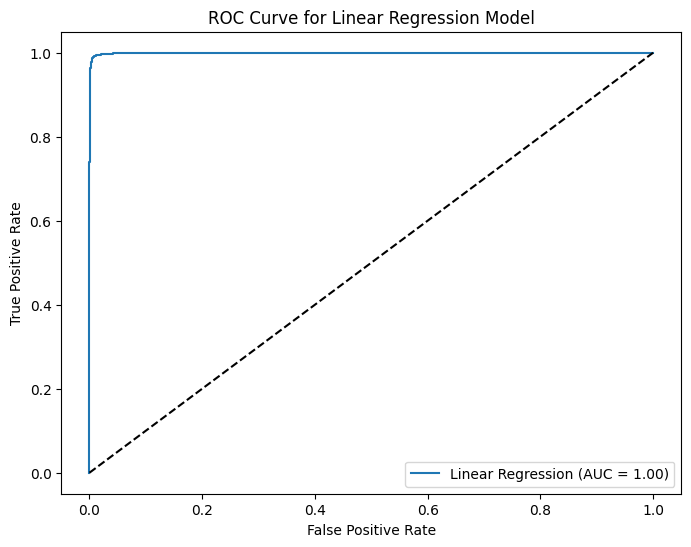

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Linear Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Linear Regression Model")
plt.legend()
plt.show()

Let's validate our model.

In [7]:
y_pred_continuous = lr_model.predict(X_val)

y_pred_binary = (y_pred_continuous >= 0.5).astype(int)

mse = mean_squared_error(y_val, y_pred_continuous)
accuracy = accuracy_score(y_val, y_pred_binary)
conf_matrix = confusion_matrix(y_val, y_pred_binary)
report = classification_report(y_val, y_pred_binary)

print("Mean Squared Error (MSE):", mse)
print("Accuracy (threshold = 0.5):", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)


fpr, tpr, thresholds = roc_curve(y_val, y_pred_continuous)
roc_auc = auc(fpr, tpr)

Mean Squared Error (MSE): 0.03236151093822198
Accuracy (threshold = 0.5): 0.9918095238095238
Confusion Matrix:
 [[10520    99]
 [   73 10308]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     10619
         1.0       0.99      0.99      0.99     10381

    accuracy                           0.99     21000
   macro avg       0.99      0.99      0.99     21000
weighted avg       0.99      0.99      0.99     21000

